In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## percepción sobre seguridad,desempeño institucional y victimización

In [2]:
file = "../../data/envipe/TPer_Vic2.csv"

In [3]:
df = pd.read_csv(file)

In [4]:
df.head()

,Unnamed: 0,ID_PER,UPM,VIV_SEL,HOGAR,RESUL_H,R_SEL,AREAM,AP6_1_1,AP6_1_2,...,AP7_4_14,AP7_4_15,FAC_HOG,FAC_ELE,EST_DIS,UPM_DIS,DOMINIO,ESTRATO,FAC_HOG_AM,FAC_ELE_AM
0,0,0100006.01.01.01,100006,1,1,B,1,14.0,1,1.0,...,NaN,NaN,172,516,5,1,U,3,173,519
1,1,0100006.02.01.02,100006,2,1,A,2,14.0,1,1.0,...,NaN,NaN,172,344,5,1,U,3,173,346
2,2,0100006.03.01.01,100006,3,1,A,1,14.0,1,1.0,...,NaN,NaN,172,344,5,1,U,3,173,346
3,3,0100006.04.01.02,100006,4,1,A,2,14.0,2,NaN,...,NaN,NaN,172,344,5,1,U,3,173,346
4,4,0100006.05.01.01,100006,5,1,B,1,14.0,2,NaN,...,NaN,NaN,172,172,5,1,U,3,173,173


In [5]:
df.shape

(84507, 142)

In [6]:
df_copy = df.copy()

In [7]:
df_copy.columns

Index(['Unnamed: 0', 'ID_PER', 'UPM', 'VIV_SEL', 'HOGAR', 'RESUL_H', 'R_SEL',
       'AREAM', 'AP6_1_1', 'AP6_1_2',
       ...
       'AP7_4_14', 'AP7_4_15', 'FAC_HOG', 'FAC_ELE', 'EST_DIS', 'UPM_DIS',
       'DOMINIO', 'ESTRATO', 'FAC_HOG_AM', 'FAC_ELE_AM'],
      dtype='object', length=142)

## Check NA

In [8]:
df_copy.isnull().any().any()

True

In [9]:
df_copy.columns[df_copy.isnull().any()]

Index(['AREAM', 'AP6_1_2', 'AP6_5_01', 'AP6_6_01', 'AP6_5_02', 'AP6_6_02',
       'AP6_6_03', 'AP6_6_04', 'AP6_8', 'AP6_10_2', 'AP6_11_1', 'AP6_12_1',
       'AP6_13_1_1', 'AP6_13_1_2', 'AP6_13_1_3', 'AP6_13_1_4', 'AP6_11_2',
       'AP6_12_2', 'AP6_13_2_1', 'AP6_13_2_2', 'AP6_13_2_3', 'AP6_13_2_4',
       'AP6_11_3', 'AP6_12_3', 'AP6_13_3_1', 'AP6_13_3_2', 'AP6_13_3_3',
       'AP6_13_3_4', 'AP6_11_4', 'AP6_12_4', 'AP6_13_4_1', 'AP6_13_4_2',
       'AP6_13_4_3', 'AP6_13_4_4', 'AP6_11_5', 'AP6_12_5', 'AP6_13_5_1',
       'AP6_13_5_2', 'AP6_13_5_3', 'AP6_13_5_4', 'AP6_11_6', 'AP6_12_6',
       'AP6_13_6_1', 'AP6_13_6_2', 'AP6_13_6_3', 'AP6_13_6_4', 'AP6_11_7',
       'AP6_12_7', 'AP6_13_7_1', 'AP6_13_7_2', 'AP6_13_7_3', 'AP6_13_7_4',
       'AP6_15_2', 'AP6_16_1', 'AP6_17_1', 'AP6_18_1', 'AP6_16_2', 'AP6_17_2',
       'AP6_18_2', 'AP6_16_3', 'AP6_17_3', 'AP6_18_3', 'AP6_16_4', 'AP6_17_4',
       'AP6_18_4', 'AP6_16_5', 'AP6_17_5', 'AP6_18_5', 'AP6_16_6', 'AP6_17_6',
       'AP6_18_6', '

In [10]:
len(pd.isnull(df_copy).any(1).nonzero()[0].tolist())

84507

In [11]:
df_copy.replace(to_replace=' ', value=np.NaN, inplace=True)

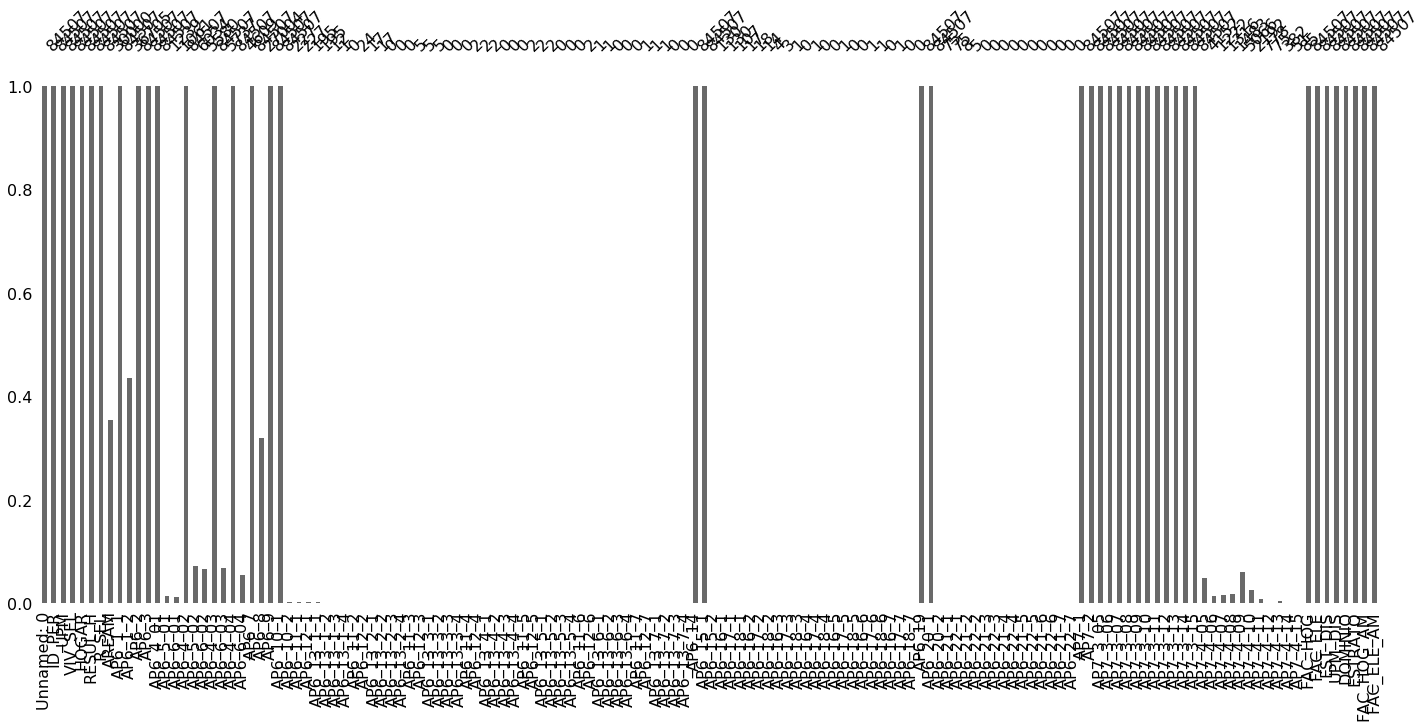

In [12]:
msno.bar(df_copy)
plt.savefig('../../images/pre_load_bar_TPer_Vic2.png')

In [13]:
df_copy.fillna(value=-1, inplace=True)

In [14]:
threshold = round(df_copy.shape[0]*.8)
threshold

67606

In [15]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        #print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            #print(column, ': ', 'd e l e t e d')
            l.append(column)

In [16]:
df_copy.shape

(84507, 142)

In [17]:
len(l)

102

In [18]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [19]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

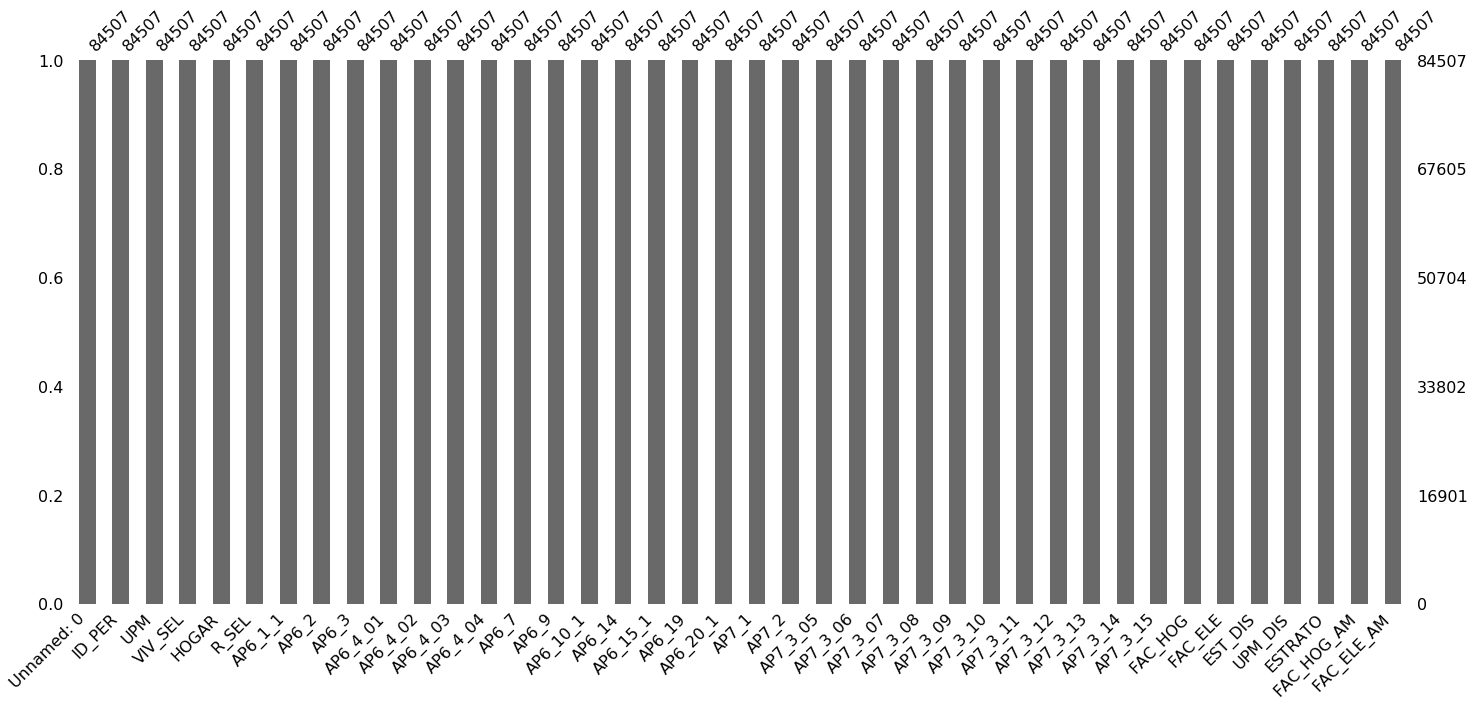

In [20]:
msno.bar(df_copy)
plt.savefig('../../images/post_load_bar_TPer_Vic2.png')

In [21]:
df_copy.isnull().any().any()

False

In [22]:
df_copy.shape

(84507, 40)

In [23]:
file = "../../dataframes/TPer_Vic2.csv"

In [24]:
df_copy.to_csv(file)